In [ ]:
import pandas as pd
import jieba
from collections import Counter

def analyze_description(file_path):
    try:
        # 读取 Excel 文件
        df = pd.read_excel(file_path)

        # 假设描述在第一列
        descriptions = df.iloc[:, 0]

        # 分词
        all_words = []
        for description in descriptions:
            words = jieba.lcut(description)
            all_words.extend(words)

        # 统计词频
        word_counts = Counter(all_words)

        # 输出前 10 个高频词
        top_words = word_counts.most_common(20)
        for word, count in top_words:
            print(f"{word}: {count}")

    except FileNotFoundError:
        print(f"错误: 文件 {file_path} 未找到。")
    except Exception as e:
        print(f"发生未知错误: {e}")

if __name__ == "__main__":
    file_path = 'D:\coding\Study_code\HUAT-kerwin-labwork\数据分析与可视化\Touge\experiment\experiment1\data\combined_house_data.xlsx'
    analyze_description(file_path)
    

<>:33: SyntaxWarning: invalid escape sequence '\c'
<>:33: SyntaxWarning: invalid escape sequence '\c'
C:\Users\21711\AppData\Local\Temp\ipykernel_9620\4199615483.py:33: SyntaxWarning: invalid escape sequence '\c'
  file_path = 'D:\coding\Study_code\HUAT-kerwin-labwork\数据分析与可视化\Touge\experiment\experiment1\data\combined_house_data.xlsx'
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\21711\AppData\Local\Temp\jieba.cache
Loading model cost 0.405 seconds.
Prefix dict has been built successfully.


 : 69906
，: 48232
套: 14441
好: 12471
户型: 10779
采光: 8591
装修: 8549
三: 8543
方正: 7830
带: 7370


<>:19: SyntaxWarning: invalid escape sequence '\c'
<>:19: SyntaxWarning: invalid escape sequence '\c'
C:\Users\21711\AppData\Local\Temp\ipykernel_26792\1371126917.py:19: SyntaxWarning: invalid escape sequence '\c'
  file_path = 'D:\coding\Study_code\HUAT-kerwin-labwork\数据分析与可视化\Touge\experiment\experiment1\data\combined_house_data.xlsx' # << --- 修改成你的文件路径


已设置字体为 SimHei (或其他你选择的字体)
成功读取 Excel 文件。
数据前5行：
                       描述     位置信息  区域  \
0       威兰德装修套三对中庭，客户只给契税   威兰德小镇   双流   
1  房子清水套三户型方正采光好无遮挡，视野开阔！  南湖逸家二期   双流   
2     南湖逸家满二精装房，中间楼层，采光良好  南湖逸家二期   双流   
3       佰客郡精装修房子配套成熟业主真心卖     佰客郡   双流   
4      加贝书香尚品 精装修 带家具家电出售  加贝书香尚品   双流   

                                                房屋信息              关注信息  \
0   3室2厅 | 86.4平米 | 东 | 简装 | 中楼层(共26层) | 2016年建 | 塔楼  135人关注 / 6个月以前发布   
1  3室1厅 | 66.12平米 | 东 | 毛坯 | 高楼层(共33层) | 2017年建 |...   40人关注 / 2个月以前发布   
2  3室1厅 | 73.59平米 | 南 | 精装 | 中楼层(共34层) | 2017年建 |...   58人关注 / 15天以前发布   
3  2室1厅 | 75.4平米 | 东 北 | 简装 | 中楼层(共16层) | 2011年建 ...   36人关注 / 2个月以前发布   
4  1室1厅 | 51.69平米 | 南 | 精装 | 高楼层(共15层) | 2007年建 | 板楼   38人关注 / 1个月以前发布   

       总价           单价  城市  
0   91.8万  单价10625元/平米  双流  
1  128.5万  单价19435元/平米  双流  
2    153万  单价20791元/平米  双流  
3     89万  单价11804元/平米  双流  
4   64.5万  单价12479元/平米  双流  

数据信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49043 entries, 0 to 490

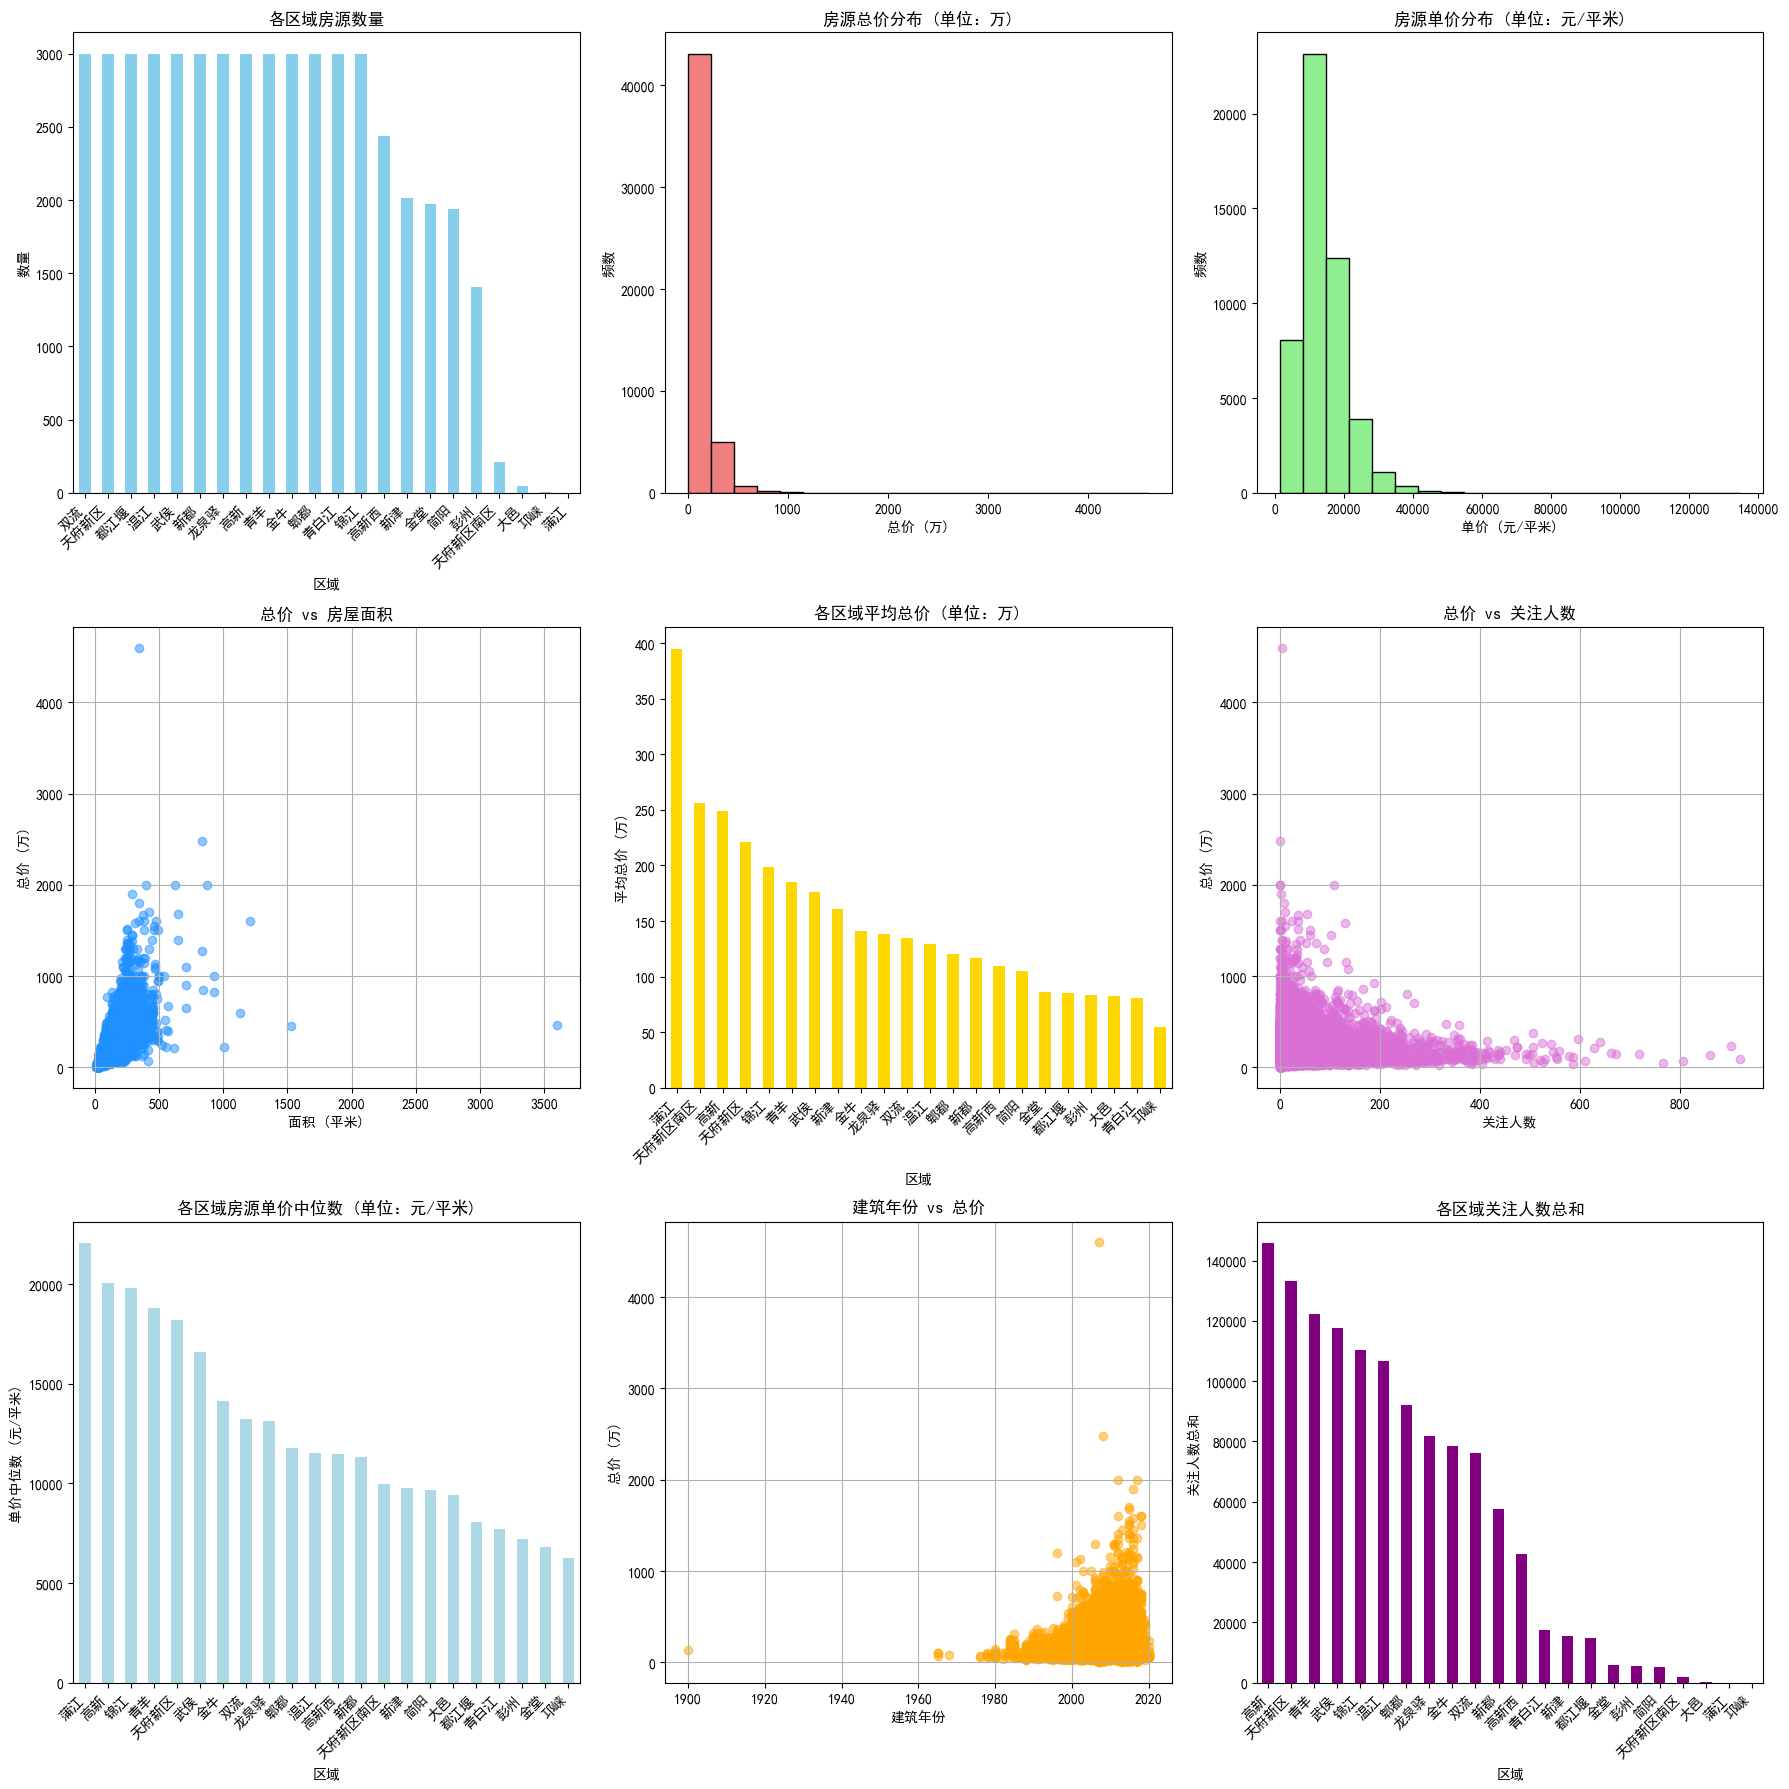


可视化图表已生成并显示。


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import re # 导入正则表达式库用于数据清洗
import matplotlib.font_manager as fm

# --- 配置 Matplotlib 支持中文显示 ---
# 方法1：尝试查找并使用系统中的中文字体 (例如 'SimHei', 'Microsoft YaHei', 'WenQuanYi Micro Hei')
# 你可能需要根据你的操作系统和已安装的字体进行调整
try:
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 或者尝试 'Microsoft YaHei', 'Arial Unicode MS' 等
    plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题
    print("已设置字体为 SimHei (或其他你选择的字体)")
except:
    print("警告：未能自动设置中文字体。图形中的中文可能显示为方块。")
    print("请尝试安装中文字体 (如 SimHei, Microsoft YaHei) 或手动指定字体路径。")


# --- 读取 Excel 文件 ---
file_path = 'D:\coding\Study_code\HUAT-kerwin-labwork\数据分析与可视化\Touge\experiment\experiment1\data\combined_house_data.xlsx' # << --- 修改成你的文件路径
try:
    df = pd.read_excel(file_path)
    print("成功读取 Excel 文件。")
    print("数据前5行：")
    print(df.head())
    print("\n数据信息：")
    df.info()
except FileNotFoundError:
    print(f"错误：文件未找到，请确保 '{file_path}' 是正确的路径。")
    exit()
except Exception as e:
    print(f"读取 Excel 文件时出错：{e}")
    exit()

# --- 数据清洗与处理 ---
print("\n开始数据清洗...")

# 1. 清洗 '总价' (去除'万'，转换为数值)
#    使用正则表达式提取数字，然后乘以 10000
def clean_total_price(price_str):
    if isinstance(price_str, (int, float)):
        return float(price_str) # 如果已经是数字，直接返回
    if isinstance(price_str, str):
        match = re.search(r'(\d+(\.\d+)?)', price_str)
        if match:
            return float(match.group(1)) # 直接返回万元单位的数值，方便后续处理
    return None # 返回 None 表示无法解析

df['总价_万'] = df['总价'].apply(clean_total_price)
df.dropna(subset=['总价_万'], inplace=True) # 删除无法解析总价的行

# 2. 清洗 '单价' (提取数字)
def clean_unit_price(price_str):
    if isinstance(price_str, (int, float)):
        return float(price_str)
    if isinstance(price_str, str):
        # 匹配 "单价" 后面的数字
        match = re.search(r'单价(\d+(\.\d+)?)', price_str)
        if match:
            return float(match.group(1))
        # 或者只匹配数字（如果格式不固定）
        match = re.search(r'(\d+(\.\d+)?)', price_str)
        if match:
            return float(match.group(1))
    return None

df['单价_元'] = df['单价'].apply(clean_unit_price)
df.dropna(subset=['单价_元'], inplace=True)

# 3. 从 '房屋信息' 提取 '面积' 和 '年份' (更复杂，这里简化处理)
#    提取面积 (如 85.46平米)
def extract_area(info_str):
    if isinstance(info_str, str):
        match = re.search(r'(\d+(\.\d+)?)\s*平米', info_str)
        if match:
            return float(match.group(1))
    return None

#    提取年份 (如 2012年建)
def extract_year(info_str):
     if isinstance(info_str, str):
        match = re.search(r'(\d{4})\s*年建', info_str)
        if match:
            return int(match.group(1))
     return None

df['面积_平米'] = df['房屋信息'].apply(extract_area)
df['建筑年份'] = df['房屋信息'].apply(extract_year)
# 注意：如果房屋信息格式多样，这里的正则表达式可能需要调整

# 4. 从 '关注信息' 提取 '关注人数'
def extract_followers(info_str):
    if isinstance(info_str, str):
        match = re.search(r'(\d+)\s*人关注', info_str)
        if match:
            return int(match.group(1))
    return 0 # 如果没有匹配到，默认为0关注

df['关注人数'] = df['关注信息'].apply(extract_followers)

print("\n数据清洗完成。处理后的数据信息：")
print(df[['区域', '总价_万', '单价_元', '面积_平米', '建筑年份', '关注人数']].head())
df.info() # 查看新列的数据类型


# --- 数据可视化 ---
print("\n开始生成可视化图表...")

# 检查是否有有效数据用于绘图
if df.empty:
    print("错误：数据处理后为空，无法进行可视化。请检查原始数据和清洗逻辑。")
    exit()

plt.figure(figsize=(18, 18)) # 创建一个更大的画布容纳多个子图

# 1. 各区域房源数量分布 (柱状图)
plt.subplot(3, 3, 1) # 3行3列的第1个图
region_counts = df['区域'].value_counts()
if not region_counts.empty:
    region_counts.plot(kind='bar', color='skyblue')
    plt.title('各区域房源数量')
    plt.xlabel('区域')
    plt.ylabel('数量')
    plt.xticks(rotation=45, ha='right') # 旋转标签防止重叠
else:
    plt.title('各区域房源数量 (无数据)')

# 2. 房源总价分布 (直方图)
plt.subplot(3, 3, 2) # 第2个图
if not df['总价_万'].empty:
    plt.hist(df['总价_万'], bins=20, color='lightcoral', edgecolor='black')
    plt.title('房源总价分布 (单位：万)')
    plt.xlabel('总价 (万)')
    plt.ylabel('频数')
else:
    plt.title('房源总价分布 (无数据)')


# 3. 房源单价分布 (直方图)
plt.subplot(3, 3, 3) # 第3个图
if not df['单价_元'].empty:
    plt.hist(df['单价_元'], bins=20, color='lightgreen', edgecolor='black')
    plt.title('房源单价分布 (单位：元/平米)')
    plt.xlabel('单价 (元/平米)')
    plt.ylabel('频数')
else:
     plt.title('房源单价分布 (无数据)')

# 4. 总价与面积关系 (散点图)
plt.subplot(3, 3, 4) # 第4个图
if not df['面积_平米'].empty and not df['总价_万'].empty:
    plt.scatter(df['面积_平米'], df['总价_万'], alpha=0.5, color='dodgerblue')
    plt.title('总价 vs 房屋面积')
    plt.xlabel('面积 (平米)')
    plt.ylabel('总价 (万)')
    plt.grid(True)
else:
    plt.title('总价 vs 房屋面积 (数据不足)')

# 5. 各区域平均总价 (柱状图)
plt.subplot(3, 3, 5) # 第5个图
if not df.empty and '区域' in df.columns and '总价_万' in df.columns:
    avg_price_by_region = df.groupby('区域')['总价_万'].mean().sort_values(ascending=False)
    if not avg_price_by_region.empty:
        avg_price_by_region.plot(kind='bar', color='gold')
        plt.title('各区域平均总价 (单位：万)')
        plt.xlabel('区域')
        plt.ylabel('平均总价 (万)')
        plt.xticks(rotation=45, ha='right')
    else:
        plt.title('各区域平均总价 (无数据)')
else:
     plt.title('各区域平均总价 (数据不足)')


# 6. 关注人数与总价关系 (散点图) - 可选，看数据是否有意义
plt.subplot(3, 3, 6) # 第6个图
if not df['关注人数'].empty and not df['总价_万'].empty:
    plt.scatter(df['关注人数'], df['总价_万'], alpha=0.5, color='orchid')
    plt.title('总价 vs 关注人数')
    plt.xlabel('关注人数')
    plt.ylabel('总价 (万)')
    plt.grid(True)
else:
    plt.title('总价 vs 关注人数 (数据不足)')

# 7. 各区域房源单价中位数比较 (柱状图)
plt.subplot(3, 3, 7)
if not df.empty and '区域' in df.columns and '单价_元' in df.columns:
    median_price_by_region = df.groupby('区域')['单价_元'].median().sort_values(ascending=False)
    if not median_price_by_region.empty:
        median_price_by_region.plot(kind='bar', color='lightblue')
        plt.title('各区域房源单价中位数 (单位：元/平米)')
        plt.xlabel('区域')
        plt.ylabel('单价中位数 (元/平米)')
        plt.xticks(rotation=45, ha='right')
    else:
        plt.title('各区域房源单价中位数 (无数据)')
else:
    plt.title('各区域房源单价中位数 (数据不足)')

# 8. 建筑年份与总价关系 (散点图)
plt.subplot(3, 3, 8)
if not df['建筑年份'].empty and not df['总价_万'].empty:
    plt.scatter(df['建筑年份'], df['总价_万'], alpha=0.5, color='orange')
    plt.title('建筑年份 vs 总价')
    plt.xlabel('建筑年份')
    plt.ylabel('总价 (万)')
    plt.grid(True)
else:
    plt.title('建筑年份 vs 总价 (数据不足)')

# 9. 各区域关注人数总和 (柱状图)
plt.subplot(3, 3, 9)
if not df.empty and '区域' in df.columns and '关注人数' in df.columns:
    total_followers_by_region = df.groupby('区域')['关注人数'].sum().sort_values(ascending=False)
    if not total_followers_by_region.empty:
        total_followers_by_region.plot(kind='bar', color='purple')
        plt.title('各区域关注人数总和')
        plt.xlabel('区域')
        plt.ylabel('关注人数总和')
        plt.xticks(rotation=45, ha='right')
    else:
        plt.title('各区域关注人数总和 (无数据)')
else:
    plt.title('各区域关注人数总和 (数据不足)')


# --- 显示图表 ---
plt.tight_layout() # 调整子图布局，防止标签重叠
plt.show()

print("\n可视化图表已生成并显示。")

<>:72: SyntaxWarning: invalid escape sequence '\c'
<>:72: SyntaxWarning: invalid escape sequence '\c'
C:\Users\21711\AppData\Local\Temp\ipykernel_26792\3255926588.py:72: SyntaxWarning: invalid escape sequence '\c'
  combined_df = pd.read_excel('D:\coding\Study_code\HUAT-kerwin-labwork\数据分析与可视化\Touge\experiment\experiment1\data\combined_house_data.xlsx')


中文显示字体设置成功 (SimHei or fallback)。

=== 开始为预测模型准备数据 ===


C:\Users\21711\AppData\Local\Temp\ipykernel_26792\3255926588.py:87: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  model_data['总楼层'].fillna(median_floors, inplace=True)
C:\Users\21711\AppData\Local\Temp\ipykernel_26792\3255926588.py:88: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



处理缺失值：保留 36423 / 49043 行数据用于建模。
进行 One-Hot 编码: 城市...
进行 One-Hot 编码: 朝向...

特征工程完成。最终用于建模的数据列:
Index(['单价', '面积', '建成时间', '总楼层', '城市_双流', '城市_大邑', '城市_天府新区', '城市_天府新区南区',
       '城市_彭州', '城市_新津', '城市_新都', '城市_武侯', '城市_温江', '城市_简阳', '城市_蒲江', '城市_郫都',
       '城市_都江堰', '城市_金堂', '城市_金牛', '城市_锦江', '城市_青白江', '城市_青羊', '城市_高新',
       '城市_高新西', '城市_龙泉驿', '东', '南', '西', '北', '东北', '东南', '西南', '西北', '未知'],
      dtype='object')

数据预览:
        单价     面积    建成时间   总楼层  城市_双流  城市_大邑  城市_天府新区  城市_天府新区南区  城市_彭州  \
0  10625.0  86.40  2016.0  26.0   True  False    False      False  False   
1  19435.0  66.12  2017.0  33.0   True  False    False      False  False   
2  20791.0  73.59  2017.0  34.0   True  False    False      False  False   
3  11804.0  75.40  2011.0  16.0   True  False    False      False  False   
4  12479.0  51.69  2007.0  15.0   True  False    False      False  False   

   城市_新津  ...  城市_龙泉驿  东  南  西  北  东北  东南  西南  西北  未知  
0  False  ...   False  1  0  0  0   0   0   0   0   0  
1  

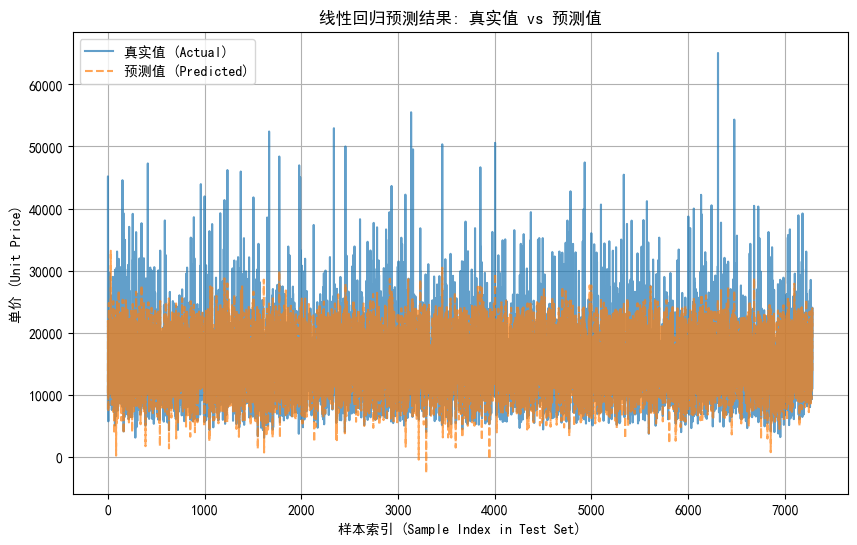


=== 脚本执行完毕 ===


In [4]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

try:
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    print("中文显示字体设置成功 (SimHei or fallback)。")
except:
    print("警告：未能自动设置中文字体，图形中的中文可能显示为方块。")

print("\n=== 开始为预测模型准备数据 ===")


def clean_total_price(price_str):
    if isinstance(price_str, (int, float)):
        return float(price_str)
    if isinstance(price_str, str):
        match = re.search(r'(\d+(\.\d+)?)', price_str)
        if match:
            return float(match.group(1))
    return None


def clean_unit_price(price_str):
    if isinstance(price_str, (int, float)):
        return float(price_str)
    if isinstance(price_str, str):
        match = re.search(r'单价(\d+(\.\d+)?)', price_str) or re.search(r'(\d+(\.\d+)?)', price_str)
        if match:
            return float(match.group(1))
    return None


def extract_area(info_str):
    if isinstance(info_str, str):
        match = re.search(r'(\d+(\.\d+)?)\s*平米', info_str)
        if match:
            return float(match.group(1))
    return None


def extract_year(info_str):
    if isinstance(info_str, str):
        match = re.search(r'(\d{4})\s*年建', info_str)
        if match:
            return int(match.group(1))
    return None


def extract_total_floors(info_str):
    if isinstance(info_str, str):
        match = re.search(r'共(\d+)层', info_str)
        if match:
            return int(match.group(1))
    return None


def extract_orientation(info_str):
    if isinstance(info_str, str):
        parts = info_str.split('|')
        if len(parts) > 2:
            orientation = parts[2].strip()
            return orientation
    return '未知'


# 假设已经合并好的数据存储在 combined_df 中
# 这里可以根据实际情况读取合并好的文件
combined_df = pd.read_excel('D:\coding\Study_code\HUAT-kerwin-labwork\数据分析与可视化\Touge\experiment\experiment1\data\combined_house_data.xlsx')

combined_df['总价_万'] = combined_df['总价'].apply(clean_total_price)
combined_df['单价'] = combined_df['单价'].apply(clean_unit_price)
combined_df['面积'] = combined_df['房屋信息'].apply(extract_area)
combined_df['建成时间'] = combined_df['房屋信息'].apply(extract_year)
combined_df['总楼层'] = combined_df['房屋信息'].apply(extract_total_floors)
combined_df['朝向'] = combined_df['房屋信息'].apply(extract_orientation)

columns_to_keep = ['单价', '面积', '建成时间', '总楼层', '城市', '朝向']
model_data = combined_df[columns_to_keep].copy()

initial_rows = len(model_data)
model_data.dropna(subset=['单价', '面积', '建成时间'], inplace=True)
median_floors = model_data['总楼层'].median()
model_data['总楼层'].fillna(median_floors, inplace=True)
model_data['朝向'].fillna('未知', inplace=True)
print(f"处理缺失值：保留 {len(model_data)} / {initial_rows} 行数据用于建模。")

print("进行 One-Hot 编码: 城市...")
city_dummies = pd.get_dummies(model_data['城市'], prefix='城市', dummy_na=False)
model_data = pd.concat([model_data, city_dummies], axis=1)
model_data.drop('城市', axis=1, inplace=True)

print("进行 One-Hot 编码: 朝向...")
possible_orientations = ['东', '南', '西', '北', '东北', '东南', '西南', '西北', '未知']
orientation_df = pd.DataFrame(0, index=model_data.index, columns=possible_orientations)

for i in model_data.index:
    orientation_str = model_data.loc[i, '朝向']
    if pd.notna(orientation_str):
        directions = orientation_str.strip().split()
        for direction in directions:
            if direction in orientation_df.columns:
                orientation_df.loc[i, direction] = 1

model_data = pd.concat([model_data, orientation_df], axis=1)
model_data.drop('朝向', axis=1, inplace=True)

print("\n特征工程完成。最终用于建模的数据列:")
print(model_data.columns)
print("\n数据预览:")
print(model_data.head())

print("\n=== 开始模型训练与预测 ===")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

Y = model_data['单价']
X = model_data.drop('单价', axis=1)

print(f"\n特征 (X) 数量: {X.shape[1]}, 样本数量: {X.shape[0]}")
print(f"目标 (Y) 样本数量: {Y.shape[0]}")

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=10)

print(f"训练集大小: X={xtrain.shape}, Y={ytrain.shape}")
print(f"测试集大小: X={xtest.shape}, Y={ytest.shape}")

print("\n训练线性回归模型...")
model = LinearRegression()
model.fit(xtrain, ytrain)
print("模型训练完成。")

print("在测试集上进行预测...")
y_pred = model.predict(xtest)
print("预测完成。")

r2 = r2_score(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)

print("\n模型评估结果:")
print(f"  R-squared (R²): {r2:.4f}")
print(f"  均方误差 (MSE): {mse:.4f}")
print(f"  均方根误差 (RMSE): {rmse:.4f}")

print("\n绘制 真实值 vs 预测值 图...")
plt.figure(figsize=(10, 6))
plt.plot(range(len(ytest)), ytest.values, label='真实值 (Actual)', alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label='预测值 (Predicted)', alpha=0.7, linestyle='--')
plt.xlabel("样本索引 (Sample Index in Test Set)")
plt.ylabel("单价 (Unit Price)")
plt.title("线性回归预测结果: 真实值 vs 预测值")
plt.legend()
plt.grid(True)
plt.show()

print("\n=== 脚本执行完毕 ===")
    

<>:112: SyntaxWarning: invalid escape sequence '\c'
<>:112: SyntaxWarning: invalid escape sequence '\c'
C:\Users\21711\AppData\Local\Temp\ipykernel_26792\571924385.py:112: SyntaxWarning: invalid escape sequence '\c'
  combined_df = pd.read_excel('D:\coding\Study_code\HUAT-kerwin-labwork\数据分析与可视化\Touge\experiment\experiment1\data\combined_house_data.xlsx')


中文显示字体设置成功 (SimHei or fallback)。

=== 开始为预测模型准备数据 ===


C:\Users\21711\AppData\Local\Temp\ipykernel_26792\571924385.py:131: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  model_data['总楼层'].fillna(median_floors, inplace=True)
C:\Users\21711\AppData\Local\Temp\ipykernel_26792\571924385.py:132: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



处理缺失值：保留 36423 / 49043 行数据用于建模。
进行 One - Hot 编码: 城市...
进行 One - Hot 编码: 朝向...
进行 One - Hot 编码: 区域...
进行 One - Hot 编码: 房屋户型...
进行 One - Hot 编码: 装修情况...
进行 One - Hot 编码: 楼层位置...
进行 One - Hot 编码: 建筑类型...

特征工程完成。最终用于建模的数据列:
Index(['单价', '面积', '建成时间', '总楼层', '城市_双流', '城市_大邑', '城市_天府新区', '城市_天府新区南区',
       '城市_彭州', '城市_新津', '城市_新都', '城市_武侯', '城市_温江', '城市_简阳', '城市_蒲江', '城市_郫都',
       '城市_都江堰', '城市_金堂', '城市_金牛', '城市_锦江', '城市_青白江', '城市_青羊', '城市_高新',
       '城市_高新西', '城市_龙泉驿', '朝向_东', '朝向_东北', '朝向_东南', '朝向_北', '朝向_南', '朝向_未知',
       '朝向_西', '朝向_西北', '朝向_西南', '房屋户型_0室0厅', '房屋户型_0室1厅', '房屋户型_1室0厅',
       '房屋户型_1室1厅', '房屋户型_1室2厅', '房屋户型_2室0厅', '房屋户型_2室1厅', '房屋户型_2室2厅',
       '房屋户型_3室0厅', '房屋户型_3室1厅', '房屋户型_3室2厅', '房屋户型_3室3厅', '房屋户型_4室0厅',
       '房屋户型_4室1厅', '房屋户型_4室2厅', '房屋户型_4室3厅', '房屋户型_4室4厅', '房屋户型_5室0厅',
       '房屋户型_5室1厅', '房屋户型_5室2厅', '房屋户型_5室3厅', '房屋户型_5室4厅', '房屋户型_6室1厅',
       '房屋户型_6室2厅', '房屋户型_6室3厅', '房屋户型_6室4厅', '房屋户型_6室5厅', '房屋户型_7室1厅',
       '房屋户型_7室2厅', '房屋户型_7室3厅', '房屋户型_7室4

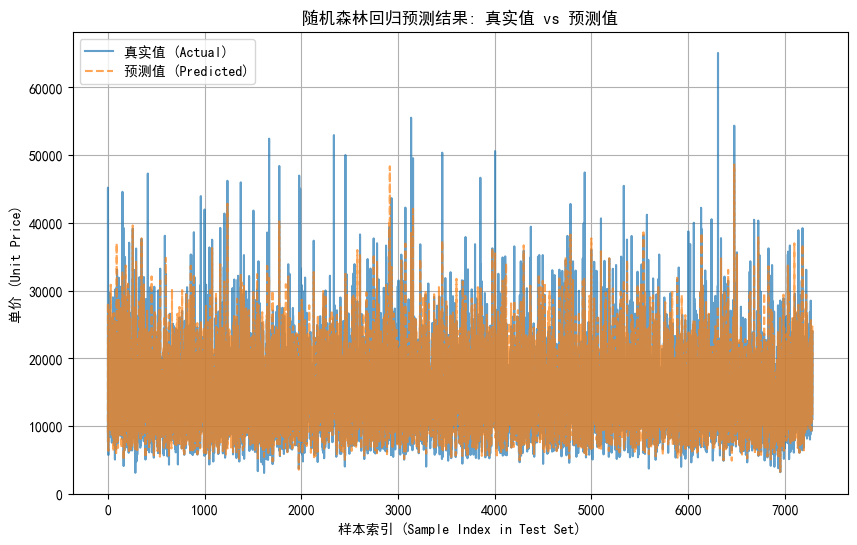

interactive(children=(IntSlider(value=30, description='仰角', max=90), IntSlider(value=30, description='方位角', ma…


=== 脚本执行完毕 ===


In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import ipywidgets as widgets
from IPython.display import display

try:
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    print("中文显示字体设置成功 (SimHei or fallback)。")
except:
    print("警告：未能自动设置中文字体，图形中的中文可能显示为方块。")

print("\n=== 开始为预测模型准备数据 ===")


def clean_total_price(price_str):
    if isinstance(price_str, (int, float)):
        return float(price_str)
    if isinstance(price_str, str):
        match = re.search(r'(\d+(\.\d+)?)', price_str)
        if match:
            return float(match.group(1))
    return None


def clean_unit_price(price_str):
    if isinstance(price_str, (int, float)):
        return float(price_str)
    if isinstance(price_str, str):
        match = re.search(r'单价(\d+(\.\d+)?)', price_str) or re.search(r'(\d+(\.\d+)?)', price_str)
        if match:
            return float(match.group(1))
    return None


def extract_area(info_str):
    if isinstance(info_str, str):
        match = re.search(r'(\d+(\.\d+)?)\s*平米', info_str)
        if match:
            return float(match.group(1))
    return None


def extract_year(info_str):
    if isinstance(info_str, str):
        match = re.search(r'(\d{4})\s*年建', info_str)
        if match:
            return int(match.group(1))
    return None


def extract_total_floors(info_str):
    if isinstance(info_str, str):
        match = re.search(r'共(\d+)层', info_str)
        if match:
            return int(match.group(1))
    return None


def extract_orientation(info_str):
    if isinstance(info_str, str):
        parts = info_str.split('|')
        for part in parts:
            if part.strip() in ['东', '南', '西', '北', '东北', '东南', '西南', '西北']:
                return part.strip()
    return '未知'


def extract_room_type(info_str):
    if isinstance(info_str, str):
        match = re.search(r'(\d+)室(\d+)厅', info_str)
        if match:
            return f"{match.group(1)}室{match.group(2)}厅"
    return '未知'


def extract_decoration(info_str):
    if isinstance(info_str, str):
        for decoration in ['简装', '精装', '豪装', '毛坯']:
            if decoration in info_str:
                return decoration
    return '未知'


def extract_floor_position(info_str):
    if isinstance(info_str, str):
        match = re.search(r'([低中高])楼层', info_str)
        if match:
            return match.group(1)
    return '未知'


def extract_building_type(info_str):
    if isinstance(info_str, str):
        for building_type in ['塔楼', '板楼']:
            if building_type in info_str:
                return building_type
    return '未知'


# 假设已经合并好的数据存储在 combined_df 中
# 这里可以根据实际情况读取合并好的文件
combined_df = pd.read_excel('D:\coding\Study_code\HUAT-kerwin-labwork\数据分析与可视化\Touge\experiment\experiment1\data\combined_house_data.xlsx')

combined_df['总价_万'] = combined_df['总价'].apply(clean_total_price)
combined_df['单价'] = combined_df['单价'].apply(clean_unit_price)
combined_df['面积'] = combined_df['房屋信息'].apply(extract_area)
combined_df['建成时间'] = combined_df['房屋信息'].apply(extract_year)
combined_df['总楼层'] = combined_df['房屋信息'].apply(extract_total_floors)
combined_df['朝向'] = combined_df['房屋信息'].apply(extract_orientation)
combined_df['房屋户型'] = combined_df['房屋信息'].apply(extract_room_type)
combined_df['装修情况'] = combined_df['房屋信息'].apply(extract_decoration)
combined_df['楼层位置'] = combined_df['房屋信息'].apply(extract_floor_position)
combined_df['建筑类型'] = combined_df['房屋信息'].apply(extract_building_type)

columns_to_keep = ['单价', '面积', '建成时间', '总楼层', '城市', '朝向', '区域', '房屋户型', '装修情况', '楼层位置', '建筑类型']
model_data = combined_df[columns_to_keep].copy()

initial_rows = len(model_data)
model_data.dropna(subset=['单价', '面积', '建成时间'], inplace=True)
median_floors = model_data['总楼层'].median()
model_data['总楼层'].fillna(median_floors, inplace=True)
model_data['朝向'].fillna('未知', inplace=True)
model_data['房屋户型'].fillna('未知', inplace=True)
model_data['装修情况'].fillna('未知', inplace=True)
model_data['楼层位置'].fillna('未知', inplace=True)
model_data['建筑类型'].fillna('未知', inplace=True)
print(f"处理缺失值：保留 {len(model_data)} / {initial_rows} 行数据用于建模。")

categorical_features = ['城市', '朝向', '区域', '房屋户型', '装修情况', '楼层位置', '建筑类型']
for feature in categorical_features:
    print(f"进行 One - Hot 编码: {feature}...")
    dummies = pd.get_dummies(model_data[feature], prefix=feature, dummy_na=False)
    model_data = pd.concat([model_data, dummies], axis=1)
    model_data.drop(feature, axis=1, inplace=True)

# 特征相关性分析
correlation_matrix = model_data.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]  # 根据相关性阈值筛选特征
model_data = model_data.drop(to_drop, axis=1)

print("\n特征工程完成。最终用于建模的数据列:")
print(model_data.columns)
print("\n数据预览:")
print(model_data.head())

# 数值型特征统计
numerical_features = model_data.select_dtypes(include=[np.number]).columns
numerical_stats = model_data[numerical_features].describe()
print("\n数值型特征统计信息:")
print(numerical_stats)

# One-Hot编码后的分类特征数量统计
one_hot_features = [col for col in model_data.columns if any(cat in col for cat in categorical_features)]
one_hot_stats = {}
for feature in one_hot_features:
    one_hot_stats[feature] = (model_data[feature] == 1).sum()
print("\nOne-Hot编码后各分类特征数量统计:")
print(pd.Series(one_hot_stats))

print("\n=== 开始模型训练与预测 ===")

Y = model_data['单价']
X = model_data.drop('单价', axis=1)

# 保存 X 的索引
X_index = X.index

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(f"\n特征 (X) 数量: {X.shape[1]}, 样本数量: {X.shape[0]}")
print(f"目标 (Y) 样本数量: {Y.shape[0]}")

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=10)

print(f"训练集大小: X={xtrain.shape}, Y={ytrain.shape}")
print(f"测试集大小: X={xtest.shape}, Y={ytest.shape}")

# 使用随机森林模型
print("\n训练随机森林回归模型...")
model = RandomForestRegressor(n_estimators=100, random_state=10)
model.fit(xtrain, ytrain)
print("模型训练完成。")

print("在测试集上进行预测...")
y_pred = model.predict(xtest)
print("预测完成。")

r2 = r2_score(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)

print("\n模型评估结果:")
print(f"  R-squared (R²): {r2:.4f}")
print(f"  均方误差 (MSE): {mse:.4f}")
print(f"  均方根误差 (RMSE): {rmse:.4f}")

# 绘制二维图：真实值 vs 预测值
print("\n绘制 真实值 vs 预测值 图...")
plt.figure(figsize=(10, 6))
plt.plot(range(len(ytest)), ytest.values, label='真实值 (Actual)', alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label='预测值 (Predicted)', alpha=0.7, linestyle='--')
plt.xlabel("样本索引 (Sample Index in Test Set)")
plt.ylabel("单价 (Unit Price)")
plt.title("随机森林回归预测结果: 真实值 vs 预测值")
plt.legend()
plt.grid(True)
plt.show()

# 绘制交互式三维图
def interactive_3d_plot(elev=30, azim=30):
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection='3d')

    # 重新进行数据划分以获取测试集索引
    _, _, _, _, _, test_indices = train_test_split(X, Y, X_index, test_size=0.2, random_state=10)
    test_area = model_data.loc[test_indices, '面积']

    ax.scatter(test_area, ytest, y_pred, c=y_pred, cmap='viridis', alpha=0.6, label='预测点')

    x_min, x_max = test_area.min(), test_area.max()
    y_min, y_max = ytest.min(), ytest.max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 10))
    zz = yy
    ax.plot_surface(xx, yy, zz, alpha=0.2, color='red', label='理想预测平面')

    ax.set_xlabel('面积 (平米)', fontsize=10)
    ax.set_ylabel('真实单价 (元/平米)', fontsize=10)
    ax.set_zlabel('预测单价 (元/平米)', fontsize=10)
    ax.set_title('三维散点图：面积-真实值-预测值 关系', fontsize=12)
    ax.view_init(elev=elev, azim=azim)  # 设置视角
    plt.legend()
    plt.show()

# 创建交互控件
elev_slider = widgets.IntSlider(min=0, max=90, step=1, value=30, description='仰角')
azim_slider = widgets.IntSlider(min=-180, max=180, step=1, value=30, description='方位角')

# 显示交互控件和图形
interactive_plot = widgets.interactive(interactive_3d_plot, elev=elev_slider, azim=azim_slider)
display(interactive_plot)

print("\n=== 脚本执行完毕 ===")